<a href="https://colab.research.google.com/github/cam2149/MachineLearningIII/blob/main/SVM_Taller%20(Ejercicio4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines

### Ejercicio 4

En esta parte del ejercicio, obtendrá habilidades más prácticas sobre cómo utilizar una SVM con un núcleo gaussiano. La siguiente parte cargará y mostrará un tercer conjunto de datos. Utilizará SVM con el kernel gaussiano con este conjunto de datos.

En el conjunto de datos proporcionado, data3, se le proporcionan las variables X, y, X_test, y_test. El código proporcionado entrena al clasificador SVM utilizando el conjunto de entrenamiento (X, y) con algunos parámetros iniciales. Su tarea es utilizar el conjunto de validación cruzada X_test, y_test para determinar los mejores parámetros C y gamma a utilizar. Debe escribir cualquier código adicional necesario para ayudarle a buscar entre los parámetros C y gamma. Tanto para C como para gamma, se sugiere probar valores en pasos multiplicativos (p. ej., 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30).

Tenga en cuenta que debe probar todos los pares posibles de valores para C y gamma (por ejemplo, C = 0.3 y gamma = 0.1). Por ejemplo, si prueba cada uno de los 8 valores enumerados anteriormente para C
y para gamma, terminarías entrenando y evaluando (en el conjunto de validación cruzada) un total de 8 x 8 = 64 modelos diferentes.

**Nota:** Puede implementar GridSearch si así lo desea.

43.5


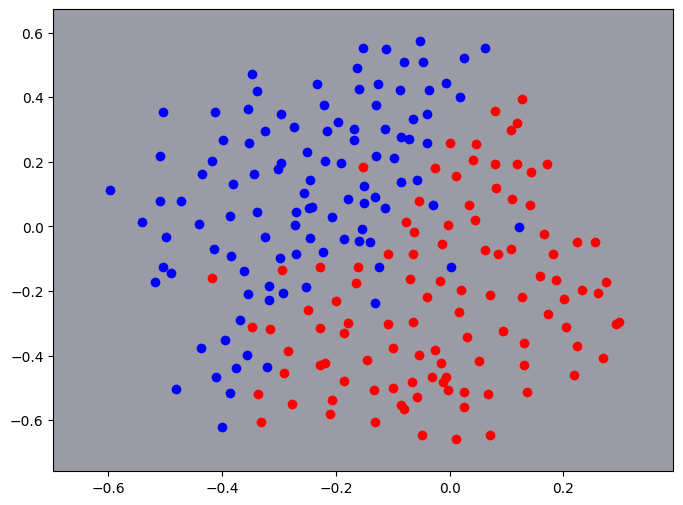

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')
from sklearn import svm
%matplotlib inline
########################################################################################
def plot_hyperplane(clf, X):
    # create a mesh to plot in
    h=0.01
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    CS=plt.contourf(xx, yy, Z,cmap=plt.cm.bone,alpha=0.5)
    #CS.cmap.set_under('yellow')
    #CS.cmap.set_over('cyan')


########################################################################################
#cargar dataset3: conjunto de entrenamiento y conjunto de prueba
data=np.loadtxt('https://raw.githubusercontent.com/cam2149/MachineLearningIII/refs/heads/main/dataset3_train.data',delimiter=',')
X=data[:,:2]
y=data[:,2].astype(int)
data=np.loadtxt('https://raw.githubusercontent.com/cam2149/MachineLearningIII/refs/heads/main/dataset3_test.data',delimiter=',')
X_test=data[:,:2]
y_test=data[:,2].astype(int)

########################

##graficar datos de entrenamiento
plt.figure(figsize=(8, 6))

plt.plot(X[y==0,0],X[y==0,1],'or')
plt.plot(X[y==1,0],X[y==1,1],'ob')

########################################################################
C=np.array([0.01, 0.03, 0.1,0.3, 1,3,10,30])
gamma=np.array([0.01, 0.03, 0.1,0.3, 1,3,10,30])
## su codigo va aqui #########

#por ejemplo para un par de valores, C = 0.01 y gamma = 0.001 se tiene que el clasificador no funciona bien, accuracy es incluso por debajo
#de 50%
clf_rbf     = svm.SVC(kernel='rbf', gamma=gamma[0], C=C[0])
#entrenar
clf_rbf.fit(X, y)
y_pred = clf_rbf.predict(X_test)
por  = (y_test==y_pred).sum()/y_test.size*100
print(por)

#graficar frontera para el mejor par (C,gamma)
plot_hyperplane(clf_rbf,X)

plt.show()

Mejores hiperparametros: {'C': 30, 'gamma': 3}
Mejor Cross-validation : 0.9194905869324475
Mejor estimador: SVC(C=30, gamma=3)
Test accuracy con GridSearchCV: 95.0


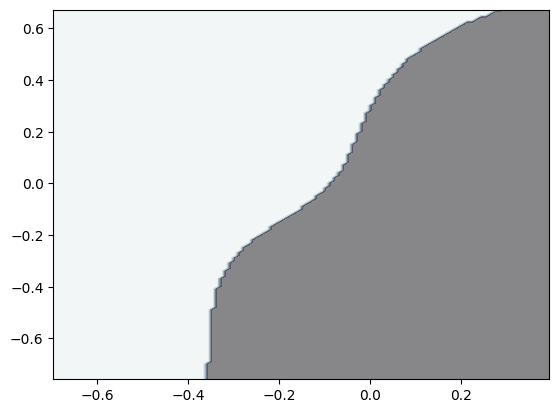

Test accuracy con SVC: 95.0


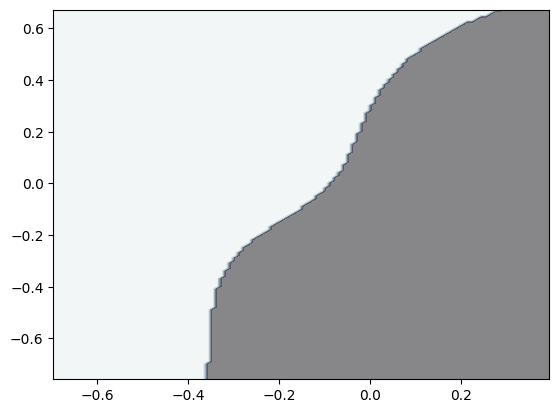

In [7]:

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
#Se crea grid con los arrays tanto para C como para gamma, con los valores sigeridos (0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30).
param_grid = {'C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30],
              'gamma': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]}

# Create the SVM classifier
clf_rbf = svm.SVC(kernel='rbf')

# Create the GridSearchCV object
grid_search = GridSearchCV(clf_rbf, param_grid, cv=5) # cv=5 Hiperparametro de validación cruzada

# Training data
grid_search.fit(X, y)
print("Mejores hiperparametros:", grid_search.best_params_)
print("Mejor Cross-validation :", grid_search.best_score_)


# Se obtiene el mejor estimador del GridSearchCV
print("Mejor estimador:", grid_search.best_estimator_)
best_clf = grid_search.best_estimator_
# Evaluar el mejor estimador en los datos de prueba
y_pred = best_clf.predict(X_test)
accuracy = (y_test == y_pred).sum() / y_test.size * 100
print("Test accuracy con GridSearchCV:", accuracy)
# Plot the hyperplane for the best (C, gamma) pair
plot_hyperplane(best_clf, X)
plt.show()

""""
Verificación con el clasificador lineal
"""
_gamma = grid_search.best_params_['gamma']
_C = grid_search.best_params_['C']

clf_rbf     = svm.SVC(kernel='rbf', gamma=_gamma, C=_C)
#Entrenar SVC
clf_rbf.fit(X, y)
y_pred = clf_rbf.predict(X_test)
por  = (y_test==y_pred).sum()/y_test.size*100

print("Test accuracy con SVC:", por)
#graficar frontera para el mejor par (C,gamma)
plot_hyperplane(clf_rbf,X)
plt.show()

El ejercicio tiene como objetivo entrenar un modelo de Máquinas de Vectores de Soporte (SVM) con un kernel RBF para clasificar datos.

Para encontrar la mejor configuración del modelo, se utiliza GridSearchCV, inicialmente se define una cuadrícula de valores sugeridos 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30 para ambos parámetros.
GridSearchCV evalúa el modelo con cada combinación mediante validación cruzada (cv=5).
GridSearchCV automatiza la búsqueda de la mejor configuración del modelo, asegurando un buen equilibrio entre precisión y generalización, para encontrar la mejor combinación de C y gamma.  
Se selecciona la combinación que produce el mejor rendimiento en los datos de prueba y se visualiza el hiperplano resultante.
